Dans cette étape, nous allons construire notre modèle adéquat en fonction de notre problème.

Instructions
Implémentez votre modèle en expliquant chaque étape dans les commentaires.

In [138]:
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import date
import numpy as np
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import math
import warnings
warnings.filterwarnings('ignore')

In [139]:
data = pd.read_csv('HRDataset_v14.csv')
data.head()

,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,...,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,...,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,...,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,...,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,...,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,...,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State                       311 non

In [141]:
data.shape

(311, 36)

In [142]:
data.describe()

,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Zip,ManagerID,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,DaysLateLast30,Absences
count,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,311.000000,303.000000,311.000000,311.000000,311.000000,311.000000,311.000000
mean,10156.000000,0.398714,0.810289,0.434084,2.392283,4.610932,2.977492,0.093248,69020.684887,0.334405,16.845659,6555.482315,14.570957,4.110000,3.890675,1.218650,0.414791,10.237942
std,89.922189,0.490423,0.943239,0.496435,1.794383,1.083487,0.587072,0.291248,25156.636930,0.472542,6.223419,16908.396884,8.078306,0.789938,0.909241,2.349421,1.294519,5.852596
min,10001.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,45046.000000,0.000000,1.000000,1013.000000,1.000000,1.120000,1.000000,0.000000,0.000000,1.000000
25%,10078.500000,0.000000,0.000000,0.000000,1.000000,5.000000,3.000000,0.000000,55501.500000,0.000000,18.000000,1901.500000,10.000000,3.690000,3.000000,0.000000,0.000000,5.000000
50%,10156.000000,0.000000,1.000000,0.000000,1.000000,5.000000,3.000000,0.000000,62810.000000,0.000000,19.000000,2132.000000,15.000000,4.280000,4.000000,0.000000,0.000000,10.000000
75%,10233.500000,1.000000,1.000000,1.000000,5.000000,5.000000,3.000000,0.000000,72036.000000,1.000000,20.000000,2355.000000,19.000000,4.700000,5.000000,0.000000,0.000000,15.000000
max,10311.000000,1.000000,4.000000,1.000000,5.000000,6.000000,4.000000,1.000000,250000.000000,1.000000,30.000000,98052.000000,39.000000,5.000000,5.000000,8.000000,6.000000,20.000000


In [143]:
# rechercher les Valeurs Manquantes par colonnes
data.isnull().sum()

Employee_Name                   0
EmpID                           0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
FromDiversityJobFairID          0
Salary                          0
Termd                           0
PositionID                      0
Position                        0
State                           0
Zip                             0
DOB                             0
Sex                             0
MaritalDesc                     0
CitizenDesc                     0
HispanicLatino                  0
RaceDesc                        0
DateofHire                      0
DateofTermination             207
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
ManagerID                       8
RecruitmentSource               0
PerformanceSco

In [144]:
# rechercher les Valeurs redondantes
data.duplicated().sum()

0

In [145]:
#copier le dataset
df = data.copy()

In [146]:
#remplacer les valeurs manquantes de la variable DateofTermination 
df['DateofTermination'].fillna(df['DateofTermination'].backfill,inplace=True) 

In [147]:
# rechercher les Valeurs Manquantes par colonnes
df.isnull().sum()

Employee_Name                 0
EmpID                         0
MarriedID                     0
MaritalStatusID               0
GenderID                      0
EmpStatusID                   0
DeptID                        0
PerfScoreID                   0
FromDiversityJobFairID        0
Salary                        0
Termd                         0
PositionID                    0
Position                      0
State                         0
Zip                           0
DOB                           0
Sex                           0
MaritalDesc                   0
CitizenDesc                   0
HispanicLatino                0
RaceDesc                      0
DateofHire                    0
DateofTermination             0
TermReason                    0
EmploymentStatus              0
Department                    0
ManagerName                   0
ManagerID                     8
RecruitmentSource             0
PerformanceScore              0
EngagementSurvey              0
EmpSatis

In [148]:
#suppression des colonnes inutiles
df = df.drop(
    [
        'Employee_Name', 'EmpID', 'MaritalStatusID', 'PositionID', 'DeptID', 'PerfScoreID', 'EmpStatusID', 
        'EmploymentStatus', 'DateofTermination', 'TermReason', 'ManagerID'
    ], axis=1)

In [149]:
df.head()

,MarriedID,GenderID,FromDiversityJobFairID,Salary,Termd,Position,State,Zip,DOB,Sex,...,Department,ManagerName,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,0,1,0,62506,0,Production Technician I,MA,1960,07/10/83,M,...,Production,Michael Albert,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,1,1,0,104437,1,Sr. DBA,MA,2148,05/05/75,M,...,IT/IS,Simon Roup,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,1,0,0,64955,1,Production Technician II,MA,1810,09/19/88,F,...,Production,Kissy Sullivan,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,1,0,0,64991,0,Production Technician I,MA,1886,09/27/88,F,...,Production,Elijiah Gray,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,0,0,0,50825,1,Production Technician I,MA,2169,09/08/89,F,...,Production,Webster Butler,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


# Analyse univarie

# DEPARTMENT

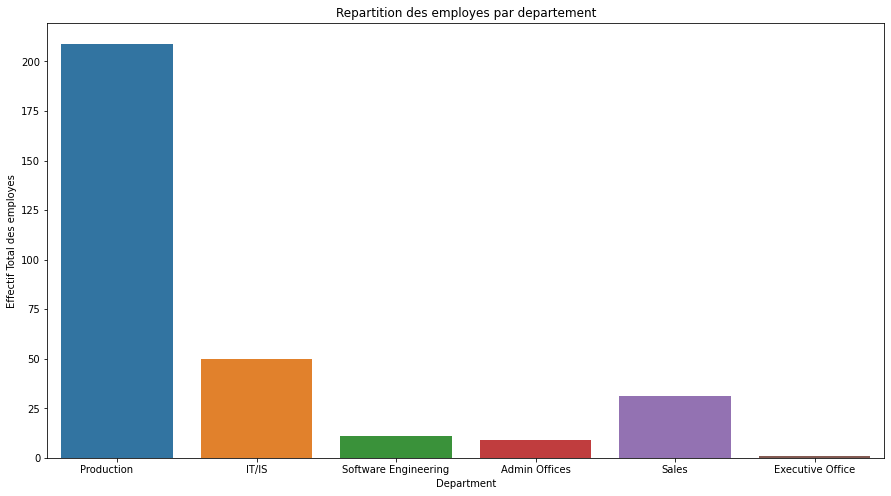

In [150]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Department'])
plt.title("Repartition des employes par departement")
plt.xlabel("Department")
plt.ylabel('Effectif Total des employes')
plt.show()

# SEXE

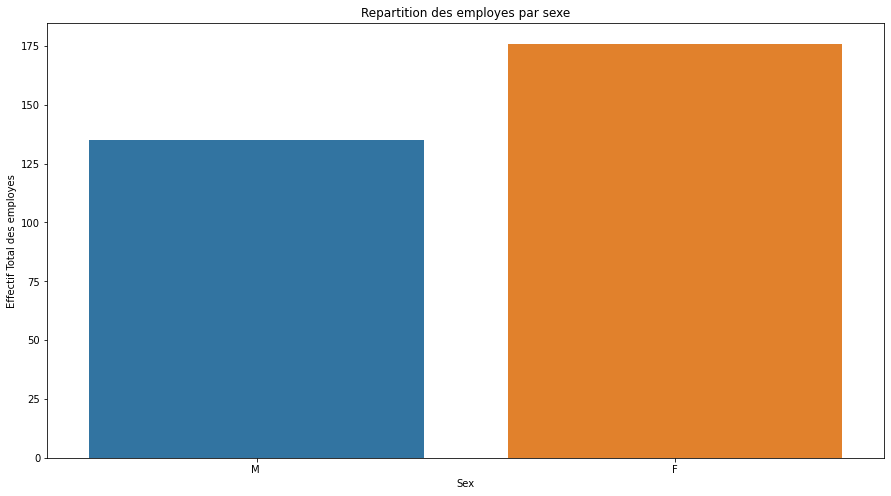

In [151]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Sex'])
plt.title("Repartition des employes par sexe")
plt.xlabel("Sex")
plt.ylabel('Effectif Total des employes')
plt.show()

# POSITION

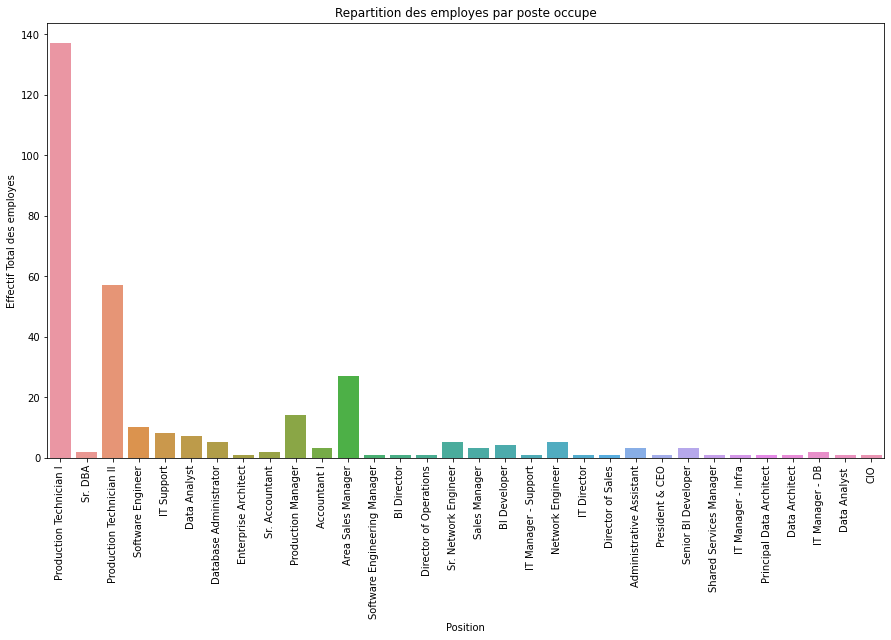

In [152]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Position'])
plt.title("Repartition des employes par poste occupe")
plt.xlabel("Position")
plt.xticks(rotation=90)
plt.ylabel('Effectif Total des employes')
plt.show()

# MaritalDesc 

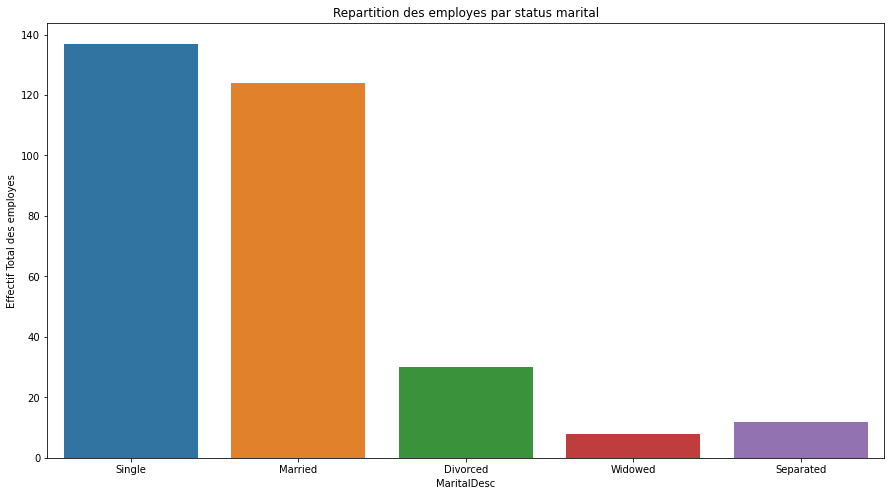

In [153]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['MaritalDesc'])
plt.title("Repartition des employes par status marital")
plt.xlabel("MaritalDesc")
plt.ylabel('Effectif Total des employes')
plt.show()

# Salary

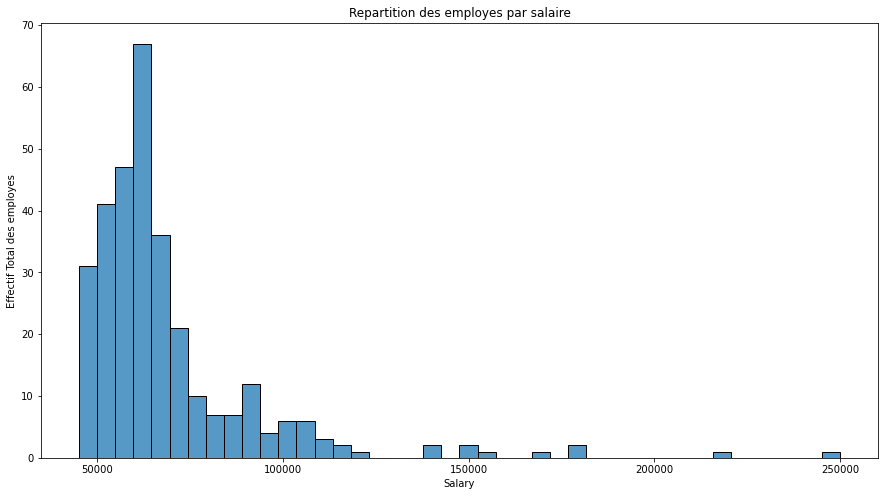

In [154]:
plt.figure(figsize = (15,8))
sns.histplot(x = df['Salary'])
plt.title("Repartition des employes par salaire")
plt.xlabel("Salary")
plt.ylabel('Effectif Total des employes')
plt.show()

# Absences

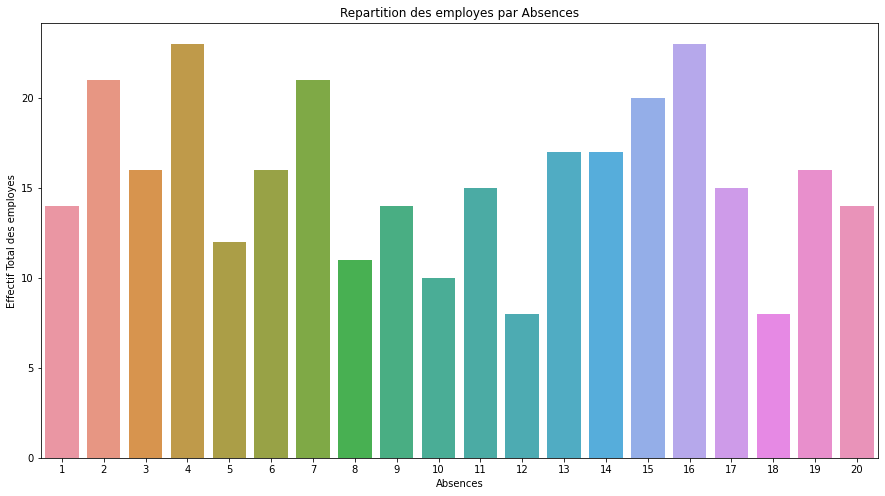

In [155]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Absences'])
plt.title("Repartition des employes par Absences")
plt.xlabel("Absences")
plt.ylabel('Effectif Total des employes')
plt.show()

# Termd

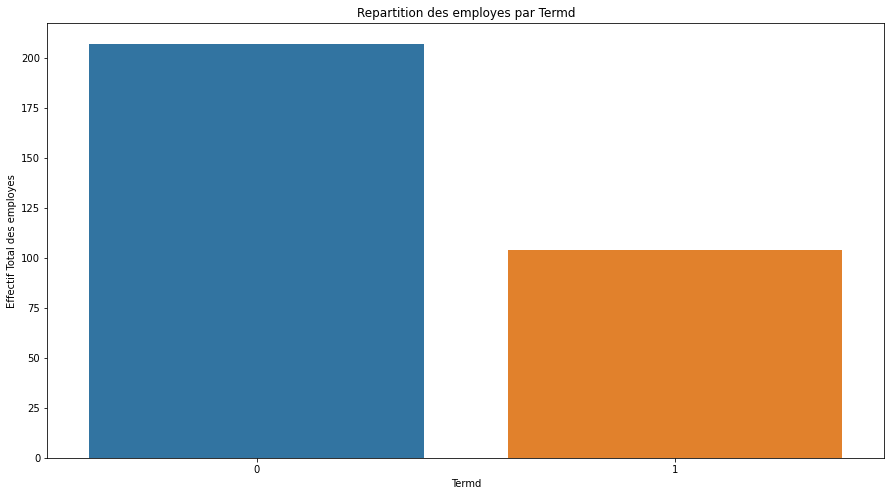

In [156]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['Termd'])
plt.title("Repartition des employes par Termd")
plt.xlabel("Termd")
plt.ylabel('Effectif Total des employes')
plt.show()

# State 

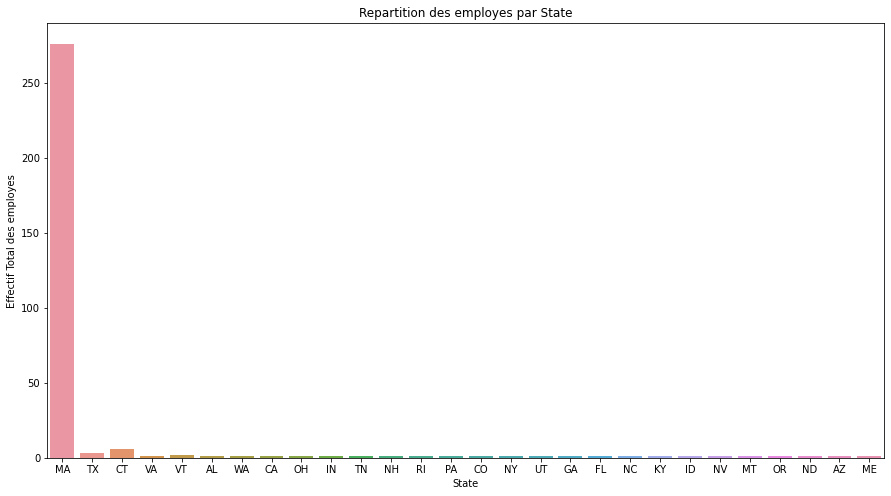

In [157]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['State'])
plt.title("Repartition des employes par State")
plt.xlabel("State")
plt.ylabel('Effectif Total des employes')
plt.show()

# RaceDesc  

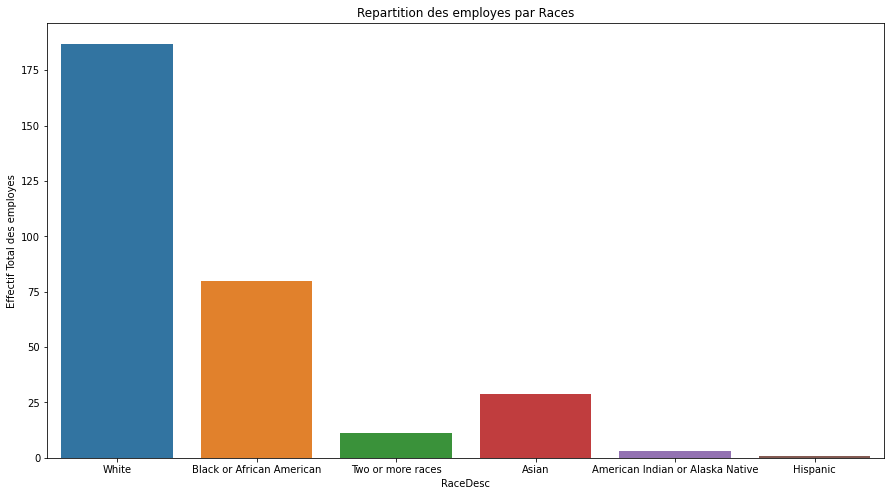

In [158]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['RaceDesc'])
plt.title("Repartition des employes par Races")
plt.xlabel("RaceDesc")
plt.ylabel('Effectif Total des employes')
plt.show()

# CitizenDesc

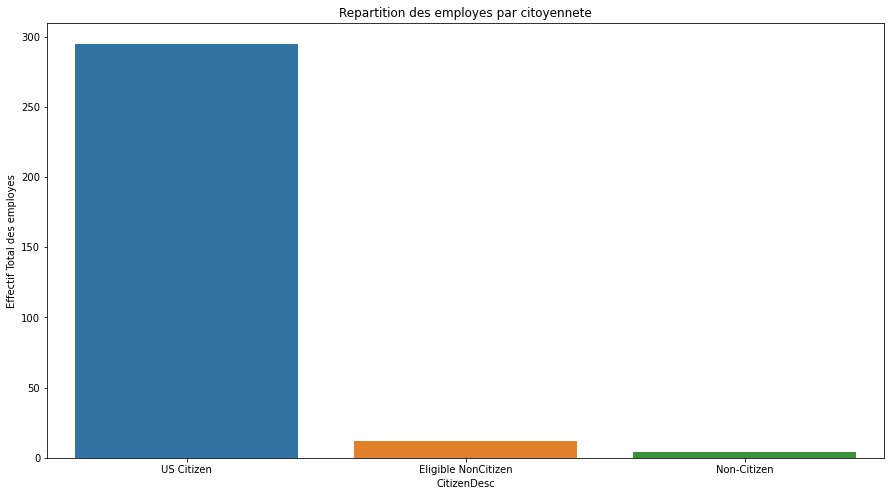

In [159]:
plt.figure(figsize = (15,8))
sns.countplot(x = df['CitizenDesc'])
plt.title("Repartition des employes par citoyennete")
plt.xlabel("CitizenDesc")
plt.ylabel('Effectif Total des employes')
plt.show()

# EngagementSurvey

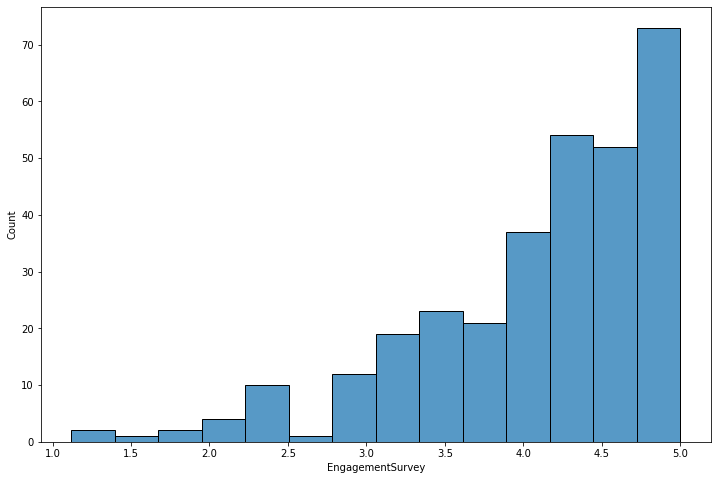

In [160]:
plt.figure(figsize=(12, 8))
sns.histplot(x=df['EngagementSurvey'])
plt.show()

# PerformanceScore

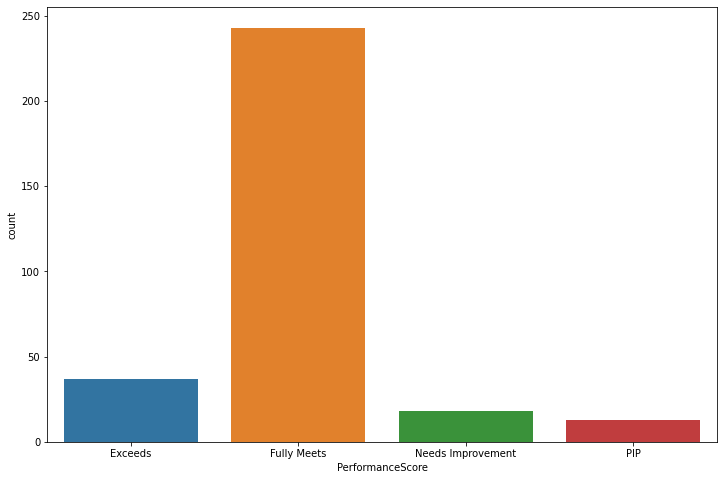

In [161]:
plt.figure(figsize=(12, 8))
sns.countplot(x=df['PerformanceScore'])
plt.show()

# ANALYSE BIVARIE

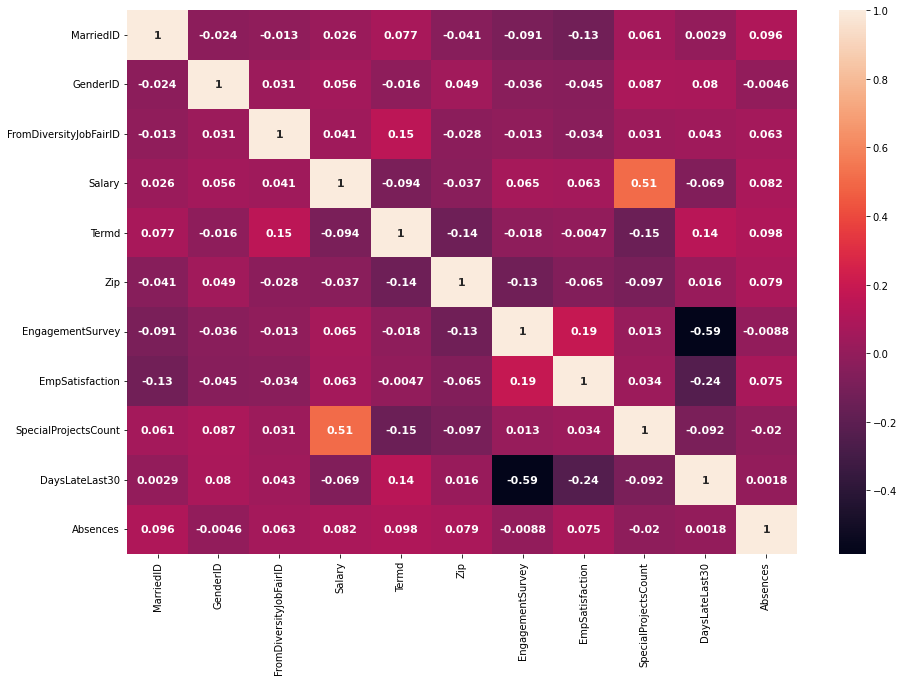

In [162]:
# Aperçu des corrélations entre variables
plt.figure(figsize=(15, 10))
sns.heatmap(df.corr(), annot=True, annot_kws={'fontsize':11, 'fontweight':'bold'})
plt.show()

# SEX vs TERMD

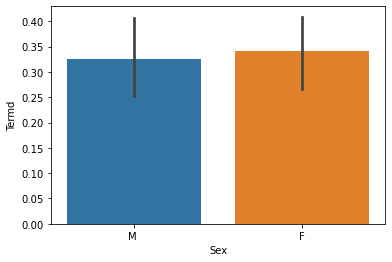

In [163]:
plt.figure()
sns.barplot(data=df, x="Sex", y="Termd")
plt.show()

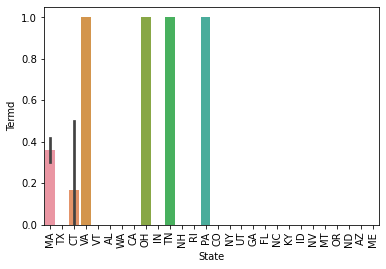

In [164]:
plt.figure()
sns.barplot(data=df, x="State", y="Termd")
plt.xticks(rotation=90)
plt.show()

In [165]:
def encode_dates(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        df[column] = pd.to_datetime(df[column])
        
        # df[prefix + '_year'] = df[column].apply(lambda x: x.year)
        df[prefix + '_month'] = df[column].apply(lambda x: x.month)
        df[prefix + '_day'] = df[column].apply(lambda x: x.day)
        
        df = df.drop(column, axis=1)
    return df

def onehot_encode(df, columns_with_prefixes):
    df = df.copy()
    for column, prefix in columns_with_prefixes:
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

def ordinal_encode(df, columns_with_orderings):
    df = df.copy()
    
    for column, ordering in columns_with_orderings:
        df[column] = df[column].apply(lambda x: ordering.index(x))
        
    return df

# One-hot encoding
nominal_columns = [
    ('Position', "PS"),
    ('State', "ST"),
    ('Zip', "ZP"),
    ('MaritalDesc', "MD"),
    ('CitizenDesc', "CD"),
    ('HispanicLatino', "HL"),
    ('RaceDesc', "RD"),
    ('Department', "DE"),
    ('ManagerName', "MN"),
    ('RecruitmentSource', "RS"),
    ('Sex', 'S')
]
date_columns = [('DOB', "DOB"), ('DateofHire', "DOH"), ('LastPerformanceReview_Date', "PRD")]

df = encode_dates(df, columns_with_prefixes=date_columns)

# transforme les colonnes choisis en valeur binaire
df = onehot_encode(df, columns_with_prefixes=nominal_columns)

# transforme le score de performance en valeur numérique
ordinal_columns = [
    ('PerformanceScore', ['PIP', 'Needs Improvement', 'Fully Meets', 'Exceeds'])
]
df = ordinal_encode(df, columns_with_orderings=ordinal_columns)

In [166]:
y = df["Termd"].values
X = df.drop("Termd", axis=1)

In [167]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [168]:
X_train.shape

(248, 290)

In [169]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)

reg_pred = reg_log.predict(X_test)
print("Score Regression Logistique : ", metrics.accuracy_score(reg_pred, y_test))

Score Regression Logistique :  0.746031746031746


In [171]:
scores = cross_val_score(reg_log, X, y, scoring='accuracy', cv=100)
scores.mean(), scores.std()

(0.7683333333333333, 0.19169564998252367)